In [92]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import roc_curve, auc

In [93]:
# Load the preprocessed dataset
df = pd.read_csv("compas-scores-two-years-preprocessed.csv", index_col=0)
y = df['two_year_recid'].astype(int)
X = df.drop(columns=['two_year_recid'])

# Load the original dataset
original_df = pd.read_csv("compas-scores-two-years.csv", index_col=0)
y_original_df= original_df['two_year_recid'].astype(int)
x_original_df = original_df.drop(columns=['two_year_recid'])


In [94]:
#  Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Logistic Regression Classifier

In [95]:
y_original_df = original_df['two_year_recid']
keep_cols = [
    'age',             # defendant age
    'sex',             # male/female
    'race',            # categorical
    'priors_count',    # number of prior offenses
    'c_charge_degree'  # felony vs misdemeanor
]

X_safe = original_df[keep_cols].copy()

# One‐hot encode the categoricals
X_lr= pd.get_dummies(X_safe, drop_first=True)
X_trainLR, X_testLR, y_trainLR, y_testLR = train_test_split(X_lr, y_original_df, test_size=0.2, random_state=42)
# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_trainLR, y_trainLR)

y_pred = logreg.predict(X_testLR)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [96]:
# Model Accuracy with original dataset
accuracy = accuracy_score(y_testLR, y_pred)
confusion = confusion_matrix(y_testLR, y_pred)
precision = precision_score(y_testLR, y_pred)
recall = recall_score(y_testLR, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Accuracy: 0.69
Precision: 0.65
Recall: 0.60


In [97]:
# fit the model with pre-processed data
logreg.fit(X_train, y_train)

LR_y_pred = logreg.predict(X_test)

In [98]:
# Model Accuracy with pre-processed dataset
accuracy = accuracy_score(y_test, LR_y_pred)
confusion = confusion_matrix(y_test, LR_y_pred)
precision = precision_score(y_test, LR_y_pred)
recall = recall_score(y_test, LR_y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Accuracy: 0.61
Precision: 0.28
Recall: 0.09


In [99]:
cnf_matrix = metrics.confusion_matrix(y_test, LR_y_pred)
cnf_matrix

array([[751, 100],
       [399,  39]])

Text(0.5, 427.9555555555555, 'Predicted label')

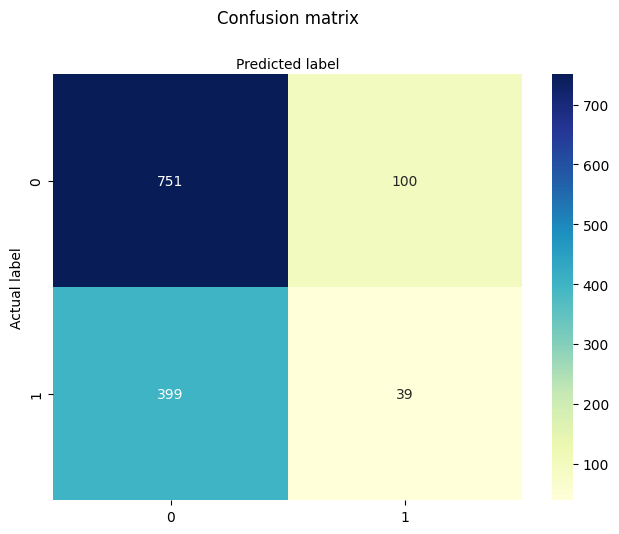

In [100]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [101]:
Xkfold= X_lr
kfold = KFold(n_splits = 20, shuffle=True)
scores = cross_val_score(estimator=logreg, X=Xkfold, y=y_original_df, scoring="accuracy", cv=kfold)
cross_val_accuracy = cross_val_score(estimator=logreg, X=Xkfold, y=y_original_df, scoring="accuracy", cv=kfold)
cross_val_accuracy_mean = np.mean(cross_val_accuracy)
cross_val_accuracy_std = np.std(cross_val_accuracy)

print(f"K-fold validation score {scores}")
print(f"Average k-fold validation score : {scores.mean()}")
print(f"Average error on fold: {cross_val_accuracy_mean}")
print(f"Standard error on fold: {cross_val_accuracy_std}")

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

K-fold validation score [0.70637119 0.68975069 0.6232687  0.66204986 0.67867036 0.64265928
 0.63157895 0.67036011 0.69252078 0.6232687  0.70637119 0.67313019
 0.67313019 0.70637119 0.70555556 0.7        0.66388889 0.68333333
 0.73611111 0.64444444]
Average k-fold validation score : 0.6756417359187442
Average error on fold: 0.674681055709449
Standard error on fold: 0.02897259926096273


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [102]:
kfold = KFold(n_splits = 20, shuffle=True)
scores = cross_val_score(estimator=logreg, X=Xkfold, y=y_original_df, scoring="precision", cv=kfold)
cross_val_precision = cross_val_score(estimator=logreg, X=Xkfold, y=y_original_df, scoring="precision", cv=kfold)
cross_val_precision_mean = np.mean(cross_val_precision)
cross_val_precision_std = np.std(cross_val_precision)

print(f"K-fold validation score {scores}")
print(f"Average k-fold validation score : {scores.mean()}")
print(f"Average error on fold: {cross_val_precision_mean}")
print(f"Standard error on fold: {cross_val_precision_std}")

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

K-fold validation score [0.73333333 0.72592593 0.68217054 0.64661654 0.616      0.69285714
 0.70779221 0.65       0.67741935 0.61654135 0.66906475 0.70689655
 0.75539568 0.67460317 0.67096774 0.64197531 0.62857143 0.61538462
 0.62698413 0.64028777]
Average k-fold validation score : 0.6689393775701805
Average error on fold: 0.6714697209176415
Standard error on fold: 0.03862901409832232


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

In [103]:
kfold = KFold(n_splits = 20, shuffle=True)
scores = cross_val_score(estimator=logreg, X=Xkfold, y=y_original_df, scoring="recall", cv=kfold)
cross_val_recall = cross_val_score(estimator=logreg, X=Xkfold, y=y_original_df, scoring="recall", cv=kfold)
cross_val_recall_mean = np.mean(cross_val_recall)
cross_val_recall_std = np.std(cross_val_recall)

print(f"K-fold validation score {scores}")
print(f"Average k-fold validation score : {scores.mean()}")
print(f"Average error on fold: {cross_val_recall_mean}")
print(f"Standard error on fold: {cross_val_recall_std}")

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

K-fold validation score [0.57668712 0.53424658 0.57142857 0.54716981 0.55828221 0.53896104
 0.53020134 0.54494382 0.52439024 0.51265823 0.57763975 0.56626506
 0.55621302 0.56395349 0.55688623 0.51234568 0.51923077 0.56603774
 0.5359116  0.60736196]
Average k-fold validation score : 0.5500407125708944
Average error on fold: 0.5533140306355487
Standard error on fold: 0.039954064403775


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

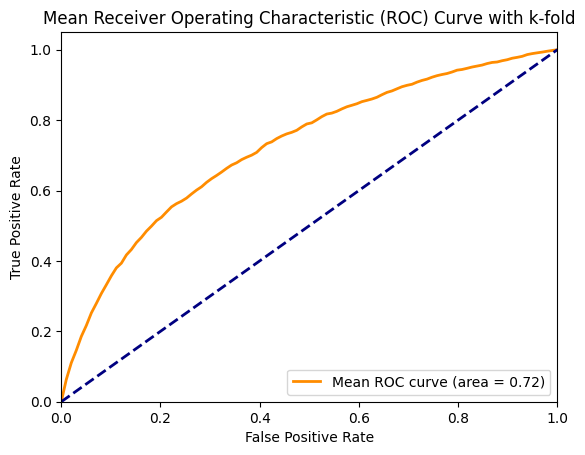

In [104]:
kfold = KFold(n_splits=20, shuffle=True)

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for train_index, test_index in kfold.split(Xkfold):
    X_train_fold, X_test_fold = Xkfold.iloc[train_index], Xkfold.iloc[test_index]
    y_train_fold, y_test_fold = y_original_df.iloc[train_index], y_original_df.iloc[test_index]
    
    logreg.fit(X_train_fold, y_train_fold)
    
    proba_matrix_fold = logreg.predict_proba(X_test_fold)
    fpr, tpr, thresholds = roc_curve(y_test_fold, proba_matrix_fold[:, 1])
    
    mean_tpr += np.interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    
mean_tpr /= kfold.get_n_splits()

roc_auc = auc(mean_fpr, mean_tpr)

plt.figure()
plt.plot(mean_fpr, mean_tpr, color='darkorange', lw=2, label='Mean ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Mean Receiver Operating Characteristic (ROC) Curve with k-fold')
plt.legend(loc="lower right")
plt.show()

## Bias in Logistic Regression Classifier on COMPASS :

FPR for African-Americans is 16.6% vs 6.2% for Caucasians. That means Black non-recidivists are almost three times more likely to be wrongly branded high-risk.

FNR for African-Americans is 87.9% vs 95.7% for Caucasians. The model “misses” 88% of actual Black recidivists but misses 96% of actual White recidivists—which, while both are extremely high, indicates the model is somewhat more “willing” to catch (or over-label) Black offenders.

In [121]:
def group_stats(g):
    tn, fp, fn, tp = confusion_matrix(
        g['true'], 
        g['pred'],
        labels=[0,1]
    ).ravel()
    return {
        'P(recid_pred=1)': (tp+fp)/len(g),
        'FPR':  fp / (fp + tn) if (fp+tn)>0 else 0,
        'FNR':  fn / (fn + tp) if (fn+tp)>0 else 0,
        'Accuracy': (tp + tn) / len(g)
    }

results = X_testLR.reset_index(drop=True).copy()
results['true'] = y_testLR.reset_index(drop=True)
results['pred'] = pd.Series(logreg.predict(X_testLR), index=results.index)

# re-add race and sex from the original df
results['race'] = original_df.loc[X_testLR.index, 'race']
results['sex']  = original_df.loc[X_testLR.index, 'sex']
# by race
by_race   = results.groupby('race').apply(lambda g: pd.Series(group_stats(g)))
# by gender
by_gender = results.groupby('sex').apply(lambda g: pd.Series(group_stats(g)))

print("Metrics by Race (Logistic Regression):\n", by_race)
print("\nMetrics by Gender:\n", by_gender)

Metrics by Race (Logistic Regression):
                   P(recid_pred=1)       FPR       FNR  Accuracy
race                                                           
African-American         0.372549  0.232143  0.456522  0.666667
Caucasian                0.435484  0.228571  0.296296  0.741935
Hispanic                 0.357143  0.100000  0.000000  0.928571
Other                    0.200000  0.100000  0.600000  0.733333

Metrics by Gender:
         P(recid_pred=1)       FPR       FNR  Accuracy
sex                                                  
Female         0.256410  0.166667  0.600000  0.666667
Male           0.409091  0.218391  0.343284  0.727273


/var/folders/6c/pmclr21d7qxghrnljkq0f9pc0000gn/T/ipykernel_59188/3624620395.py:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  by_race   = results.groupby('race').apply(lambda g: pd.Series(group_stats(g)))
/var/folders/6c/pmclr21d7qxghrnljkq0f9pc0000gn/T/ipykernel_59188/3624620395.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  by_gender = results.groupby('sex').apply(lambda g: pd.Series(group_stats(

# Random Forest Classifier

In [106]:
# Train a Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

rf.fit(X_train, y_train)

#  Make predictions
rf_y_pred = rf.predict(X_test)

Accuracy: 0.87
Precision: 0.82
Recall: 0.77


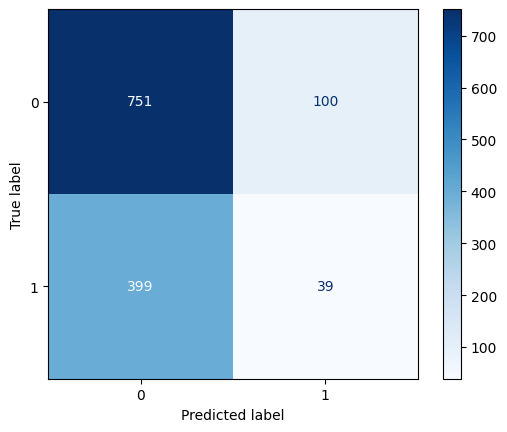

In [107]:
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_confusion = confusion_matrix(y_test, rf_y_pred)
rf_precision = precision_score(y_test, rf_y_pred)
rf_recall = recall_score(y_test, rf_y_pred)
print(f"Accuracy: {rf_accuracy:.2f}")
print(f"Precision: {rf_precision:.2f}")
print(f"Recall: {rf_recall:.2f}")
disp = ConfusionMatrixDisplay(confusion, display_labels=rf.classes_)
disp.plot(cmap='Blues')
plt.show()

In [108]:
kfold = KFold(n_splits = 20, shuffle=True)
scores = cross_val_score(estimator=rf, X=X, y=y, scoring="accuracy", cv=kfold)
cross_val_accuracy = cross_val_score(estimator=rf, X=X, y=y, scoring="accuracy", cv=kfold)
cross_val_accuracy_mean = np.mean(cross_val_accuracy)
cross_val_accuracy_std = np.std(cross_val_accuracy)

print(f"K-fold validation score {scores}")
print(f"Average k-fold validation score : {scores.mean()}")
print(f"Average error on fold: {cross_val_accuracy_mean}")
print(f"Standard error on fold: {cross_val_accuracy_std}")

K-fold validation score [0.85448916 0.87925697 0.87306502 0.85448916 0.88544892 0.88198758
 0.90372671 0.86024845 0.8447205  0.86024845 0.90372671 0.87267081
 0.89440994 0.88509317 0.88509317 0.87888199 0.88819876 0.89130435
 0.87267081 0.89751553]
Average k-fold validation score : 0.8783623060208064
Average error on fold: 0.8754062265638523
Standard error on fold: 0.016806416447352247


In [109]:
kfold = KFold(n_splits = 20, shuffle=True)
scores = cross_val_score(estimator=rf, X=X, y=y, scoring="precision", cv=kfold)
cross_val_precision = cross_val_score(estimator=rf, X=X, y=y, scoring="precision", cv=kfold)
cross_val_precision_mean = np.mean(cross_val_precision)
cross_val_precision_std = np.std(cross_val_precision)

print(f"K-fold validation score {scores}")
print(f"Average k-fold validation score : {scores.mean()}")
print(f"Average error on fold: {cross_val_precision_mean}")
print(f"Standard error on fold: {cross_val_precision_std}")

K-fold validation score [0.86607143 0.85321101 0.91919192 0.85416667 0.88073394 0.8627451
 0.86046512 0.86597938 0.82352941 0.89285714 0.86363636 0.86746988
 0.89655172 0.83673469 0.81052632 0.85106383 0.9        0.86138614
 0.90196078 0.82178218]
Average k-fold validation score : 0.8645031513416962
Average error on fold: 0.866450585025
Standard error on fold: 0.0358257332821298


In [110]:
kfold = KFold(n_splits = 20, shuffle=True)
scores = cross_val_score(estimator=rf, X=X, y=y, scoring="recall", cv=kfold)
cross_val_recall = cross_val_score(estimator=rf, X=X, y=y, scoring="recall", cv=kfold)
cross_val_recall_mean = np.mean(cross_val_recall)
cross_val_recall_std = np.std(cross_val_recall)

print(f"K-fold validation score {scores}")
print(f"Average k-fold validation score : {scores.mean()}")
print(f"Average error on fold: {cross_val_recall_mean}")
print(f"Standard error on fold: {cross_val_recall_std}")

K-fold validation score [0.7398374  0.76415094 0.74380165 0.80672269 0.83928571 0.81
 0.73333333 0.78651685 0.76576577 0.8        0.7734375  0.75892857
 0.73148148 0.7398374  0.78070175 0.75471698 0.72580645 0.76223776
 0.75221239 0.84313725]
Average k-fold validation score : 0.7705955947995518
Average error on fold: 0.7754343876523702
Standard error on fold: 0.027131695733323302


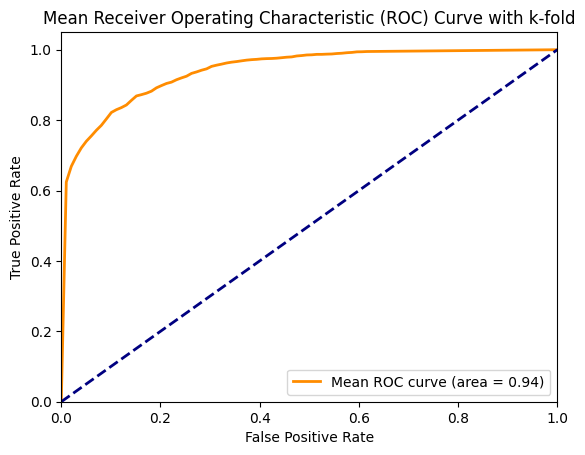

In [111]:
kfold = KFold(n_splits=20, shuffle=True)

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for train_index, test_index in kfold.split(X):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    
    rf.fit(X_train_fold, y_train_fold)
    
    proba_matrix_fold = rf.predict_proba(X_test_fold)
    fpr, tpr, thresholds = roc_curve(y_test_fold, proba_matrix_fold[:, 1])
    
    mean_tpr += np.interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    
mean_tpr /= kfold.get_n_splits()

roc_auc = auc(mean_fpr, mean_tpr)

plt.figure()
plt.plot(mean_fpr, mean_tpr, color='darkorange', lw=2, label='Mean ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Mean Receiver Operating Characteristic (ROC) Curve with k-fold')
plt.legend(loc="lower right")
plt.show()

## Bias in Random Forest Classifier on COMPASS:

FPR: lack non-recidivists suffer a higher FPR than White non-recidivists (9.1% vs. 8.0%), meaning a Black person who won’t re-offend has a significantly higher chance of being mislabeled high-risk.

FNR: The model is actually better at catching true African-American recidivists (only 22% missed) than true White recidivists (28% missed)

In [120]:
def group_stats(g):
    tn, fp, fn, tp = confusion_matrix(
        g['true'], 
        g['pred'],
        labels=[0,1]
    ).ravel()
    return {
        'P(recid_pred=1)': (tp+fp)/len(g),
        'FPR':  fp / (fp + tn) if (fp+tn)>0 else 0,
        'FNR':  fn / (fn + tp) if (fn+tp)>0 else 0,
        'Accuracy': (tp + tn) / len(g)
    }

results = X_test.copy()
results['true'] = y_test
results['pred'] = rf_y_pred

# re-add race and sex from X_safe since df does not have these columns
results['gender'] = results['sex_Male'].map({1:'Male', 0:'Female'})

# 4) Recover race from your one-hot columns:
race_cols = [c for c in X_test.columns if c.startswith('race_')]
# idxmax finds which dummy is 1
results['race'] = (results[race_cols]
                       .idxmax(axis=1)          # e.g. 'race_Caucasian'
                       .str.replace('race_','')  # → 'Caucasian'
                   )
# by race
by_race   = results.groupby('race').apply(lambda g: pd.Series(group_stats(g)))
# by gender
by_gender = results.groupby('gender').apply(lambda g: pd.Series(group_stats(g)))

print("Metrics by Race (Random Forest):\n", by_race)
print("\nMetrics by Gender:\n", by_gender)

Metrics by Race (Random Forest):
                   P(recid_pred=1)       FPR       FNR  Accuracy
race                                                           
African-American         0.340206  0.090909  0.220641  0.862113
Asian                    0.500000  0.333333  0.000000  0.750000
Caucasian                0.269923  0.080292  0.278261  0.861183
Hispanic                 0.382716  0.096154  0.103448  0.901235
Native American          1.000000  0.000000  0.000000  1.000000
Other                    0.243243  0.037037  0.200000  0.918919

Metrics by Gender:
         P(recid_pred=1)       FPR       FNR  Accuracy
gender                                               
Female         0.275000  0.026316  0.108696  0.950000
Male           0.359133  0.116861  0.248649  0.832817


/var/folders/6c/pmclr21d7qxghrnljkq0f9pc0000gn/T/ipykernel_59188/2636022930.py:29: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  by_race   = results.groupby('race').apply(lambda g: pd.Series(group_stats(g)))
/var/folders/6c/pmclr21d7qxghrnljkq0f9pc0000gn/T/ipykernel_59188/2636022930.py:31: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  by_gender = results.groupby('gender').apply(lambda g: pd.Series(group_sta

# Support Vector Machine Classifier

In [113]:
#Create a svm Classifier
clf = svm.SVC(kernel='rbf',class_weight='balanced',probability=True) # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
sf_y_pred = clf.predict(X_test)

In [114]:
# Model Accuracy
accuracy = accuracy_score(y_test, sf_y_pred)
confusion = confusion_matrix(y_test, sf_y_pred)
precision = precision_score(y_test, sf_y_pred)
recall = recall_score(y_test, sf_y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Accuracy: 0.77
Precision: 0.64
Recall: 0.75


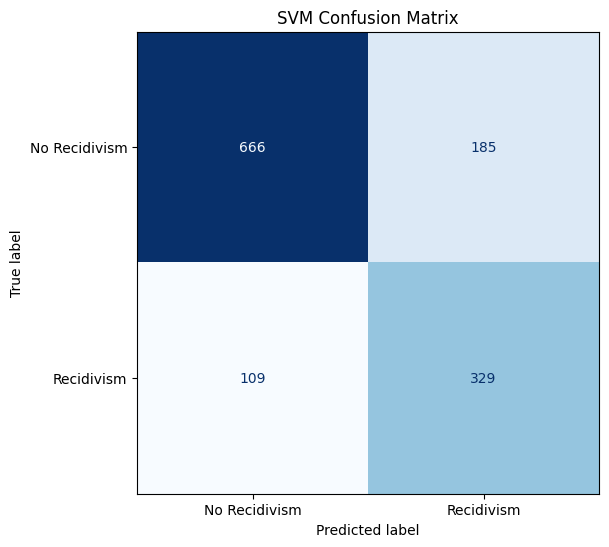

In [116]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, sf_y_pred, labels=clf.classes_)

# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=['No Recidivism', 'Recidivism']
)

# Plot
fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(ax=ax, cmap='Blues', colorbar=False)
plt.title("SVM Confusion Matrix")
plt.show()

In [117]:
kfold = KFold(n_splits = 20, shuffle=True)
scores = cross_val_score(estimator=clf, X=X, y=y, scoring="accuracy", cv=kfold)
cross_val_accuracy = cross_val_score(estimator=clf, X=X, y=y, scoring="accuracy", cv=kfold)
cross_val_accuracy_mean = np.mean(cross_val_accuracy)
cross_val_accuracy_std = np.std(cross_val_accuracy)

print(f"K-fold validation score {scores}")
print(f"Average k-fold validation score : {scores.mean()}")
print(f"Average error on fold: {cross_val_accuracy_mean}")
print(f"Standard error on fold: {cross_val_accuracy_std}")

K-fold validation score [0.82043344 0.80185759 0.74922601 0.77399381 0.75232198 0.78881988
 0.8136646  0.77639752 0.77018634 0.7826087  0.76708075 0.8447205
 0.81987578 0.7515528  0.78881988 0.79192547 0.75465839 0.80745342
 0.80124224 0.81055901]
Average k-fold validation score : 0.7883699017364383
Average error on fold: 0.7900726881141471
Standard error on fold: 0.029599373758103963


In [118]:
kfold = KFold(n_splits = 20, shuffle=True)
scores = cross_val_score(estimator=clf, X=X, y=y, scoring="precision", cv=kfold)
cross_val_precision = cross_val_score(estimator=clf, X=X, y=y, scoring="precision", cv=kfold)
cross_val_precision_mean = np.mean(cross_val_precision)
cross_val_precision_std = np.std(cross_val_precision)

print(f"K-fold validation score {scores}")
print(f"Average k-fold validation score : {scores.mean()}")
print(f"Average error on fold: {cross_val_precision_mean}")
print(f"Standard error on fold: {cross_val_precision_std}")

KeyboardInterrupt: 

In [ ]:
kfold = KFold(n_splits = 20, shuffle=True)
scores = cross_val_score(estimator=clf, X=X, y=y, scoring="recall", cv=kfold)
cross_val_recall = cross_val_score(estimator=clf, X=X, y=y, scoring="recall", cv=kfold)
cross_val_recall_mean = np.mean(cross_val_recall)
cross_val_recall_std = np.std(cross_val_recall)

print(f"K-fold validation score {scores}")
print(f"Average k-fold validation score : {scores.mean()}")
print(f"Average error on fold: {cross_val_recall_mean}")
print(f"Standard error on fold: {cross_val_recall_std}")

In [ ]:
kfold = KFold(n_splits=20, shuffle=True)

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for train_index, test_index in kfold.split(X):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    
    clf.fit(X_train_fold, y_train_fold)
    
    proba_matrix_fold = clf.predict_proba(X_test_fold)
    fpr, tpr, thresholds = roc_curve(y_test_fold, proba_matrix_fold[:, 1])
    
    mean_tpr += np.interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    
mean_tpr /= kfold.get_n_splits()

roc_auc = auc(mean_fpr, mean_tpr)

plt.figure()
plt.plot(mean_fpr, mean_tpr, color='darkorange', lw=2, label='Mean ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Mean Receiver Operating Characteristic (ROC) Curve with k-fold')
plt.legend(loc="lower right")
plt.show()

## Bias in Support Vector Machine Classifier on COMPASS:

FPR: Non-recidivist Black defendants are about 11 percentage points more likely to be falsely flagged “high risk” than non-recidivist White defendants.

FNR: Among true recidivists, the SVM misses fewer Black offenders (22.4%) than White offenders (34.8%)—a 12 pp advantage for Black defendants at the cost of the higher false-alarm rate above.

In [119]:
def group_stats(g):
    tn, fp, fn, tp = confusion_matrix(
        g['true'], 
        g['pred'],
        labels=[0,1]
    ).ravel()
    return {
        'P(recid_pred=1)': (tp+fp)/len(g),
        'FPR':  fp / (fp + tn) if (fp+tn)>0 else 0,
        'FNR':  fn / (fn + tp) if (fn+tp)>0 else 0,
        'Accuracy': (tp + tn) / len(g)
    }

results = X_test.copy()
results['true'] = y_test
results['pred'] = sf_y_pred
# re-add race and sex from X_safe since df does not have these columns
results['gender'] = results['sex_Male'].map({1:'Male', 0:'Female'})

# 4) Recover race from your one-hot columns:
race_cols = [c for c in X_test.columns if c.startswith('race_')]
# idxmax finds which dummy is 1
results['race'] = (results[race_cols]
                       .idxmax(axis=1)          # e.g. 'race_Caucasian'
                       .str.replace('race_','')  # → 'Caucasian'
                   )
# by race
by_race   = results.groupby('race').apply(lambda g: pd.Series(group_stats(g)))
# by gender
by_gender = results.groupby('gender').apply(lambda g: pd.Series(group_stats(g)))

print("Metrics by Race (SVM):\n", by_race)
print("\nMetrics by Gender:\n", by_gender)

Metrics by Race (SVM):
                   P(recid_pred=1)       FPR       FNR  Accuracy
race                                                           
African-American         0.442010  0.252525  0.224199  0.757732
Asian                    0.500000  0.333333  0.000000  0.750000
Caucasian                0.293059  0.142336  0.347826  0.796915
Hispanic                 0.567901  0.384615  0.103448  0.716049
Native American          1.000000  0.000000  0.000000  1.000000
Other                    0.189189  0.000000  0.300000  0.918919

Metrics by Gender:
         P(recid_pred=1)       FPR       FNR  Accuracy
gender                                               
Female          0.26250  0.061404  0.239130   0.88750
Male            0.44582  0.240401  0.221622   0.76677


/var/folders/6c/pmclr21d7qxghrnljkq0f9pc0000gn/T/ipykernel_59188/1870326863.py:28: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  by_race   = results.groupby('race').apply(lambda g: pd.Series(group_stats(g)))
/var/folders/6c/pmclr21d7qxghrnljkq0f9pc0000gn/T/ipykernel_59188/1870326863.py:30: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  by_gender = results.groupby('gender').apply(lambda g: pd.Series(group_sta

# Conclusion:

LR: flags Black at 37%, White at 44%—FPR gap ~2.4 pp (23% vs 23%), FNR gap ~16 pp (46% vs 30%).

SVM: flags Black at 44%, White at 29%—FPR gap ~11 pp, FNR gap ~−12 pp (it catches more Black recidivists).

RF: flags Black at 34%, White at 27%—FPR gap ~1 pp, FNR gap ~−6 pp.

Overall, Random Forest shows the smallest FPR gap between African-Americans and Caucasians, while Logistic Regression has the smallest gap in P(pred=1). All three models, however, exhibit non-negligible disparities in error rates across these two groups.